In [ ]:
#@title Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title  Puxar Base de Dados


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%pylab inline

#Importando bibliotecas necessárias.

uri = '/content/drive/Shareddrives/Colab_Grupo2/dataToPredictTarget.csv'

data = pd.read_csv(uri)
# del data["Unnamed: 0"]
#Declarando caminho do conjunto de dados e instanciando um dataframe.

df = data[['follow_up_classified',
           'age',
           'menarche',
           'period',
           'hormone_therapy',
           'tempo_rep_hormo',
           'family_cancer',
           'benign',
           'histological_grade',
           'progesteron_perct',
           'ultinfo',
           'rec01',
           'rec02',
           'rec03',
           'rec04',
           'trathosp',
           'tumor_stage',
           't',
           'm',
           'n',
           'meta01',
           'meta02',
           'meta03',
           'meta04',
           'treatment',
           'weight',
           'bmi'
           ]]

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#@title  Treino do modelo de predição

X = df.drop('follow_up_classified', axis=1).copy()
y = df[['follow_up_classified']].copy()
# Declara quais as features serão utilizadas para criação da árvore de decisão.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
# Treina 75% e realizar 25% de teste.


In [ ]:
#@title  Árvore de decisão

clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth= 100)
# Cria objeto da árvore de decisão.

clf.fit(X_train,y_train)
# Cria a árvore de decisão.

y_predict = clf.predict(X_test)
# Predizendo a feature X com base nas features Y.

np.sqrt(metrics.mean_squared_error(y_test,y_predict))

0.5652060594524974

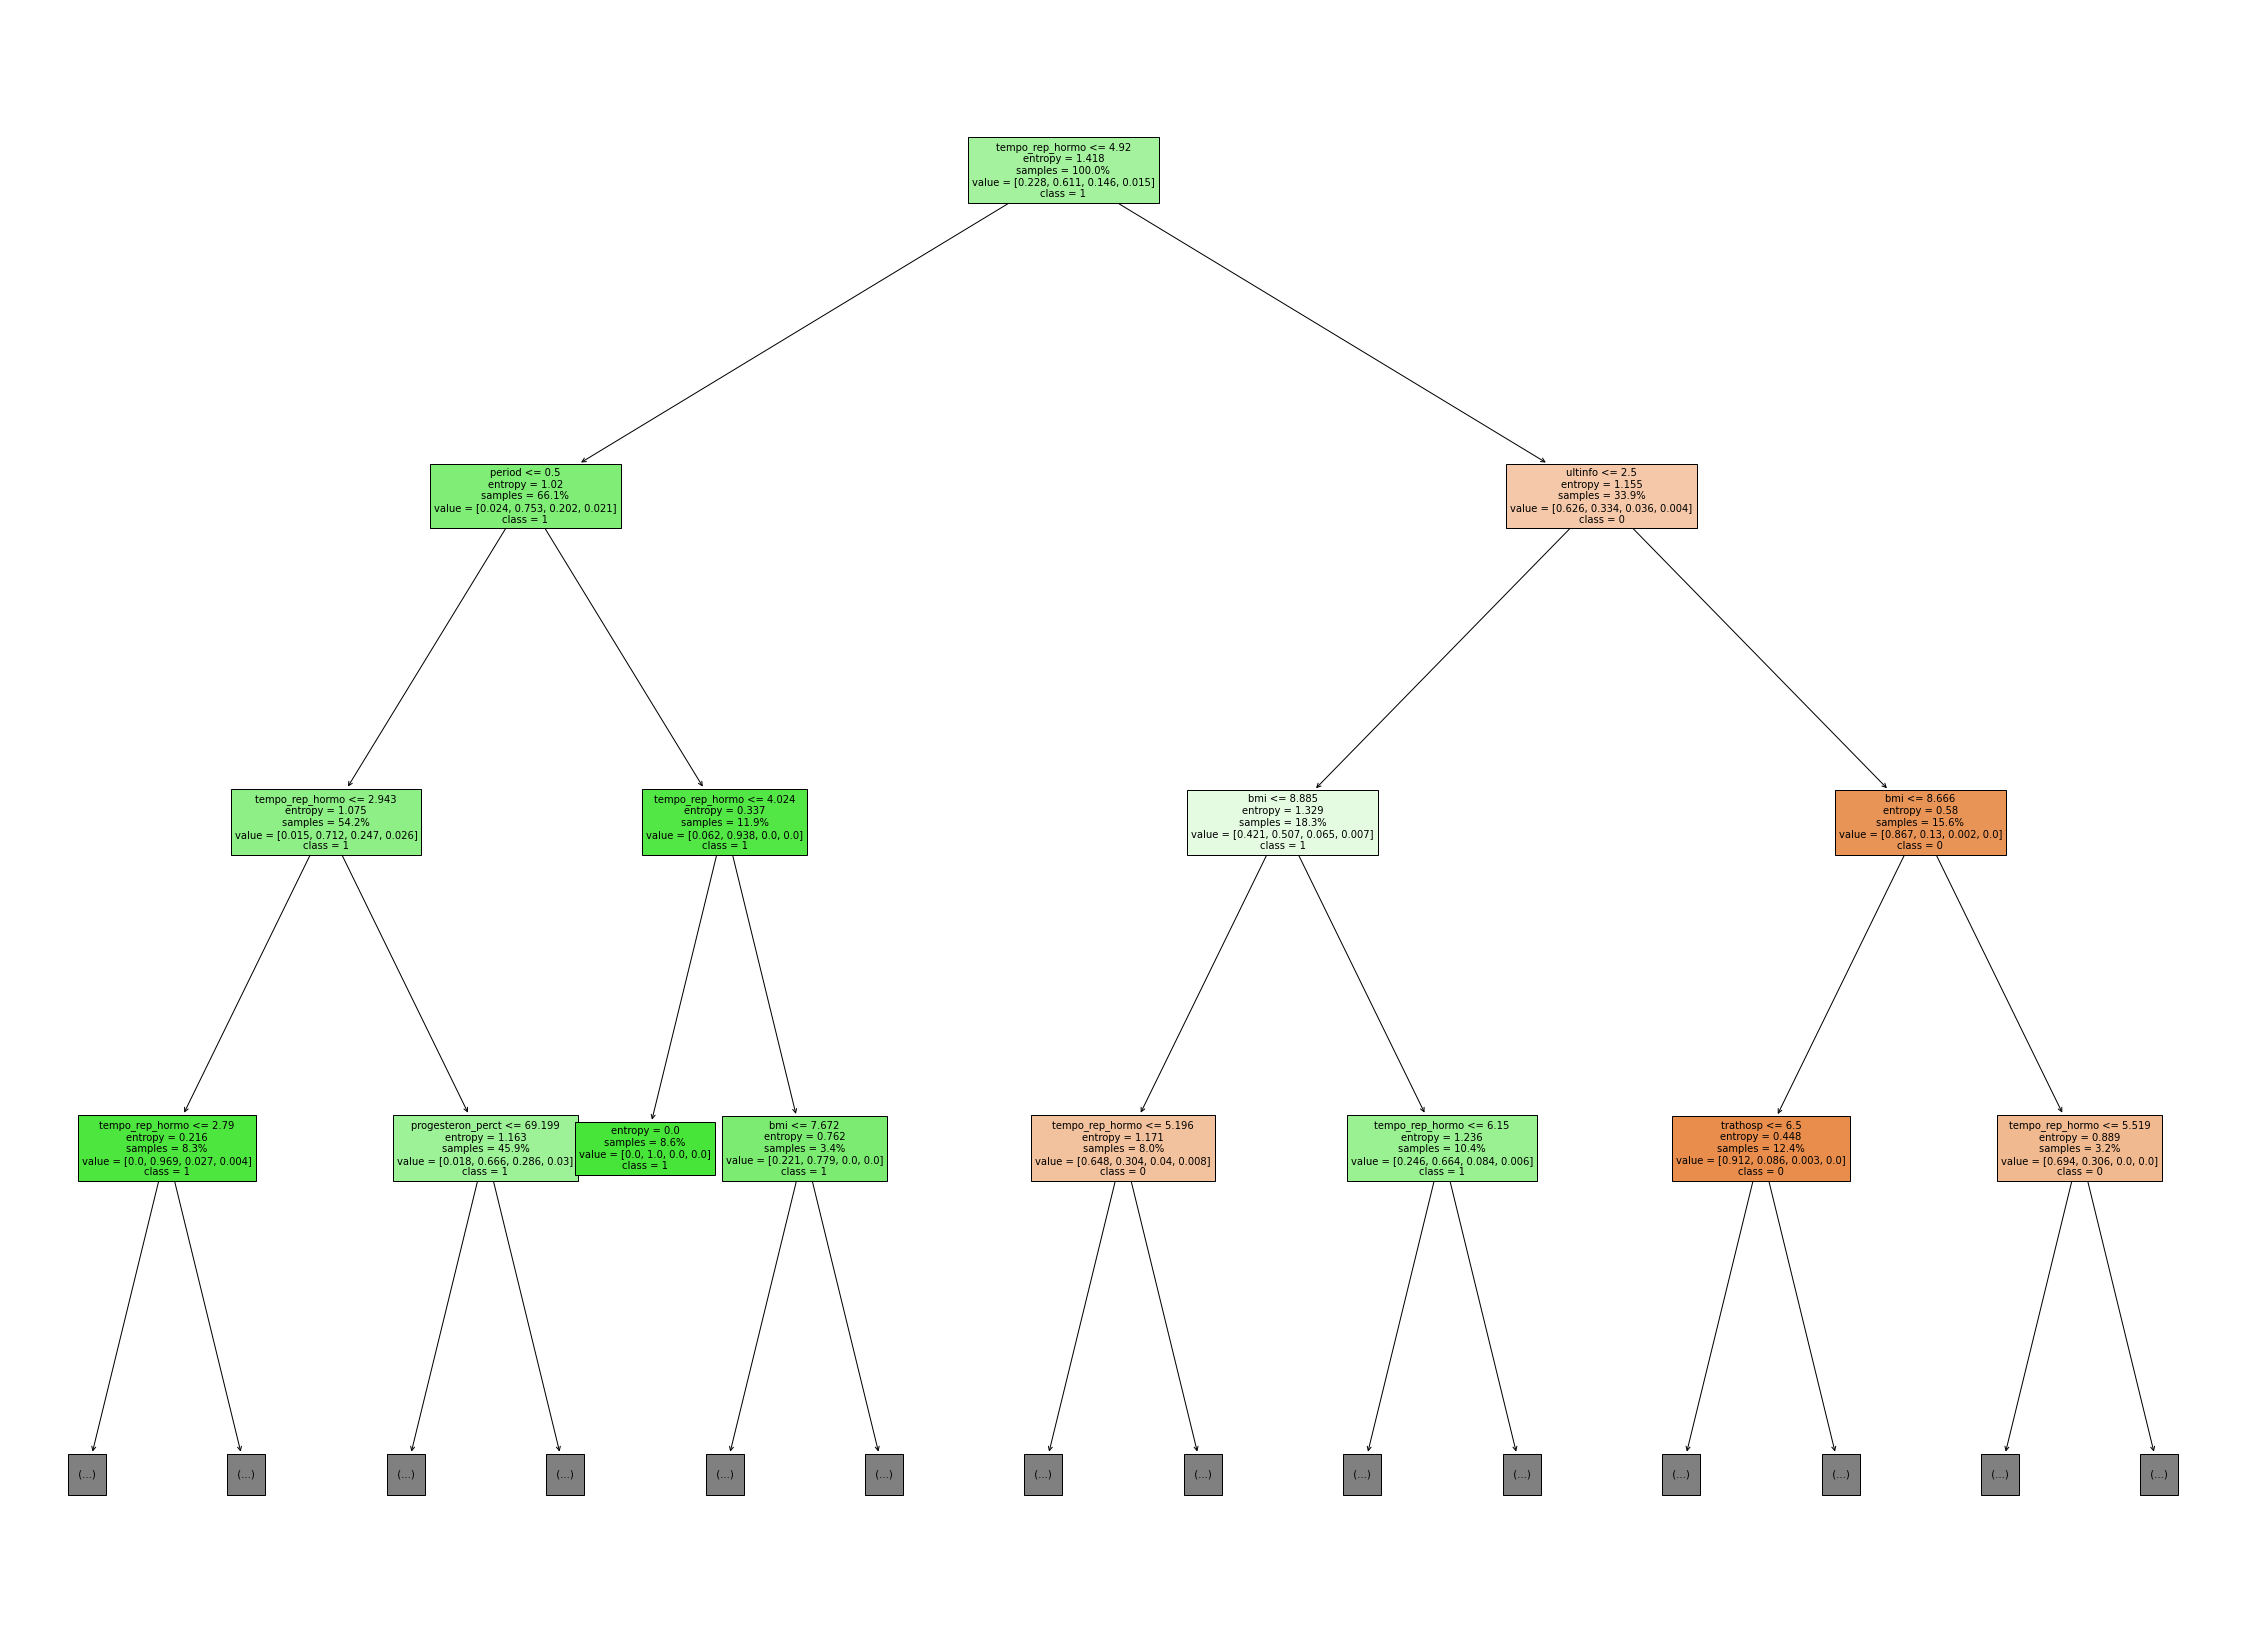

In [ ]:
pylab.figure(figsize=(40, 30))
tree.plot_tree(clf,
               feature_names = X_train.columns, 
               class_names=['0', '1', '2', '3'],
               filled = True,
               proportion=True,
               max_depth= 3,
               fontsize=10,
               );
plt.savefig("decision_tree.png")

#Plotar árvore de decisão e salvar como imagem

MSE (Mean-Squared-Error): 0.3194578896418199
Accuracy: 0.7347531461761858


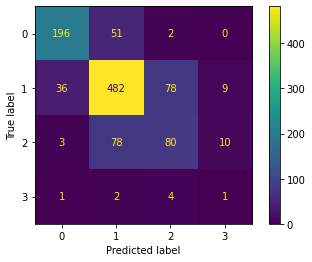

In [ ]:
mse = metrics.mean_squared_error(y_test, y_predict)
acu = metrics.accuracy_score(y_test, y_predict) 

print('MSE (Mean-Squared-Error): %s' %mse)
print('Accuracy: %s' %acu)

#Medir a taxa de erro e a acurácia do modelo

ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict)).plot()


In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 20)
knn1 = KNeighborsClassifier(n_neighbors = 30)

#Determinar o número de vizinhos

In [ ]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

#Criar o modelo

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

#Predizendo com base no modelo testado

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5))
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1))

#Mede a acurácia do modelo

Accuracy with k=5 0.5982575024201355
Accuracy with k=1 0.5992255566311714
